<a href="https://colab.research.google.com/github/Alop1/AI_random_forest/blob/master/Pola/Workspace_1_workingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!ls
!cd '/content/gdrive/My Drive/FailOmen'

gdrive	sample_data


In [0]:
import pandas as pd

#Importing dataset
dataset = pd.read_csv('/content/gdrive/My Drive/FailOmen/convertDataToML.csv', index_col=False)

In [0]:
x = dataset.iloc[:, 0:23739].values
y = dataset.iloc[:, 23739:24281].values

In [8]:
failCount = 0
passCount = 0
failBuildCount = 0

for a in y:
  if a[np.argmin(a)] == 0 : failBuildCount += 1
  for b in a:
    if b == 0 : failCount += 1
    if b == 1 : passCount += 1
print (failBuildCount)
print (failCount)
print (passCount)
print (failCount / passCount * 100, '%', sep='')

632
973
2607673
0.037312960635785236%


## **UTILITIES:**


---

In [0]:
def count_distribution(prediction):
  #Distributions of argmins through all the predictions
  i = 1
  tab = [0] * 542
  for a in prediction:
    j = 0
    for b in a:
      if b < 1.0 : j = j + 1

    #print (i, '. ', j, np.argmin(a))
    tab[np.argmin(a)] += 1
    i = i + 1

  i = 0
  number_of_tests =  542
  distributed_array = [0 for iterator in range(number_of_tests)]
  for a in tab:
    if a > 0 : 
      pass
#       print ('position', i, '\targmin count', a)
      distributed_array[i] = a
    i += 1
#   print (i)
  create_plot(range(len(distributed_array)), distributed_array)  
  return distributed_array


In [0]:
def create_plot(x_data, y_data=0):
  import matplotlib.pyplot as plt
  if y_data == 0:  
    unzip = list(zip(*x_data))
    x_data, y_data = unzip[0],unzip[1]
    print (x_data)
    print ("\n", y_data)
  
  plt.bar(x_data, y_data, align='center', alpha=1, width = 3)
  plt.xlabel("test no")
  plt.ylabel("how many times test was predicted as one of the best(defaul one of 15)")
  plt.show()

### `#uwaga, w funkcji ponizej zmieniany jest procent jaki stanowia spasowane testy `
if not not_add_passed_data%**3**:
 3 oznacza 33% testow spsowanych idzie do danych trenujacych/testujacych
 10 oznacza 10%
 itp
 domyslnie dodawanie testo spasowanych na False,
 

In [0]:
def searchForFailed(yList, percent_of_passed_data=20, withpassed_data=False): 
  changedRowList = []
  not_add_passed_data = 0
  for row in range (len(yList)):
    if 0 in yList[row]:
      changedRowList.append(row)
      continue
    elif withpassed_data == True: 
      modulo_arg = int(1/(percent_of_passed_data/100))
      if not (not_add_passed_data%modulo_arg):
        changedRowList.append(row)
    not_add_passed_data += 1
      
  return changedRowList

def returnFailedData(xList, yList, changedRowList):
  xFailed = []
  yFailed = []
  
  for row in changedRowList:
    xFailed.append(xList[row])
    yFailed.append(yList[row])
  xFailed = np.array(xFailed)
  yFailed = np.array(yFailed)
  return xFailed, yFailed

In [0]:
def failsCount():
  fala = 0
  for i, a in enumerate(yTest):
    j = 0
    for k, b in enumerate(a):
      if b < 1.0 : j += 1

    if j > 0 : 
      print (i, '. ', j)
    i = i + 1
    fala += j
  print (fala)

In [0]:
# Evaluation function

def evaluation(predictions,additionalPredictions, refYsupervisor):
  
  lenght = len(refYsupervisor)

  failPositions = [[] for y in range(lenght)]

  for i, a in enumerate(refYsupervisor):

    for j, b in enumerate(a):
      if b == 0 : failPositions[i].append(j);

  predictionsTemp = predictions.copy()
#   print(predictionsTemp) 
#   print(type(predictionsTemp))
#   print(len(predictionsTemp))
#   print(predictionsTemp[0])
#   print(predictionsTemp[0][0])
  predictionPositions = [[] for y in range(lenght)]


  for i, a in enumerate(predictionsTemp):

    if len(failPositions[i]) != 0:
      for j in range(len(failPositions[i]) + additionalPredictions):
        argmin = np.argmin(a)
        predictionPositions[i].append(argmin)
        predictionsTemp[i][argmin] = 1

  predictionHits = [[] for y in range(lenght)]

  for i, a in enumerate(failPositions):
    count = 0
    for j, b in enumerate(a):


      for c in predictionPositions[i]:
  #      predictionHits[i].append(predictions[i][c].copy())
  #      print(predictions[i][c])
  #      print(predictions[i][c])
  #      print (b, c)
        if c == b : count += 1

    if len(failPositions) != 0:
      predictionHits[i].insert(0,count)


  failsCount = 0
  hitsCount = 0
  for i, a in enumerate(refYsupervisor):
    j = 0

    for k, b in enumerate(a):
      if b < 1.0 : j += 1

  #  if j > 0 :
  #    print (i, '.', j, predictionHits[i])


    failsCount += j
    hitsCount += predictionHits[i][0]

  print('Percentage of fails predicted', hitsCount / failsCount * 100, '%')



---



---



---



## **PREPARE DATA**

In [0]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#y = labelencoder.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

**(optional) create only 'failed data'**

In [0]:
xReduced, yReduced = returnFailedData(x, y, searchForFailed(y,90,withpassed_data=True))
# xReduced, yReduced = returnFailedData(x, y, searchForFailed(y))
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xReduced, yReduced, test_size = 0.2)



---



---



---



## PREPARE MODEL

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#12140
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(6070, activation="sigmoid", input_dim=23739, kernel_initializer="uniform")) # TRY smaller input_dim value or less neurons
# Adding the second hidden layer
#model.add(Dense(12140, activation = "sigmoid", kernel_initializer="uniform"))
# Adding the output layer
model.add(Dense(542, activation="sigmoid", kernel_initializer="uniform"))

Using TensorFlow backend.


In [87]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(xTrain, yTrain, batch_size = 20, epochs = 15)

Epoch 1/15
1620/1620 [==============================] - 18s 11ms/step - loss: 0.0087 - acc: 0.9993
Epoch 2/15
1620/1620 [==============================] - 15s 9ms/step - loss: 0.0088 - acc: 0.9993
Epoch 3/15
1620/1620 [==============================] - 15s 9ms/step - loss: 0.0087 - acc: 0.9993
Epoch 4/15
1620/1620 [==============================] - 15s 9ms/step - loss: 0.0088 - acc: 0.9993
Epoch 5/15
1620/1620 [==============================] - 15s 9ms/step - loss: 0.0087 - acc: 0.9993
Epoch 6/15
1620/1620 [==============================] - 15s 9ms/step - loss: 0.0087 - acc: 0.9993
Epoch 7/15
1620/1620 [==============================] - 15s 9ms/step - loss: 0.0088 - acc: 0.9993
Epoch 8/15
1620/1620 [==============================] - 15s 9ms/step - loss: 0.0088 - acc: 0.9993
Epoch 9/15
1620/1620 [==============================] - 15s 9ms/step - loss: 0.0086 - acc: 0.9993
Epoch 10/15
1620/1620 [==============================] - 15s 9ms/step - loss: 0.0087 - acc: 0.9992
Epoch 11/15
1620/1



---



---



---



## **TEST MODEL**

In [39]:
lossTest, accTest = model.evaluate(xTest, yTest)

print('Test accuracy:', accTest)
print('Test loss:', lossTest)


406/406 [==============================] - 0s 704us/step
Test accuracy: 0.999145663724157
Test loss: 0.010414310747051033


In [107]:

#choose one


# predictions = model.predict(xTest)
predictions = model.predict(xTest)
print(len(predictions))
print((len(predictions)))



963
963


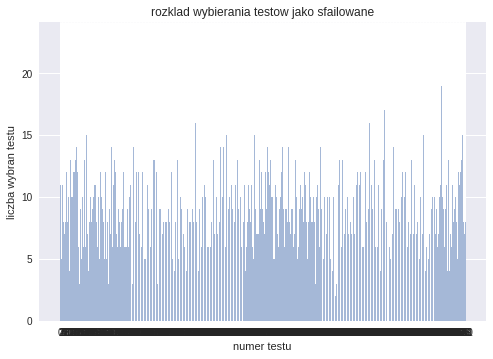

In [111]:
def create_fake_predictions(quantity_oftests_to_choose, quantity_of_predictions):
  import random
  quantity_of_predictions = len(quantity_of_predictions)
  random_matrix_pred = []
  stats =  [0 for i in range(542)]
  
  for row_no in range(quantity_of_predictions):
    random_pred_list = [1 for i in range(542)]
    random_indexes_list = [random.randint(0,541) for i in range(quantity_oftests_to_choose)] # todo usunac powtorzenia 
    for idx in random_indexes_list:
      random_pred_list[idx] = 0
      stats[idx] = stats[idx] + 1
    random_matrix_pred.append(random_pred_list)
    
  y_pos = range(len(stats))
  performance = stats

  plt.bar(y_pos, performance, align='center', alpha=0.5)
  plt.xticks(y_pos)
  plt.ylabel('liczba wybran testu')
  plt.xlabel('numer testu')
  plt.title('rozklad wybierania testow jako sfailowane')

  plt.show()
    
 
  random_matrix_pred = np.array(random_matrix_pred)
  return random_matrix_pred


fake_predictions_matrix = create_fake_predictions(5,xTest) 


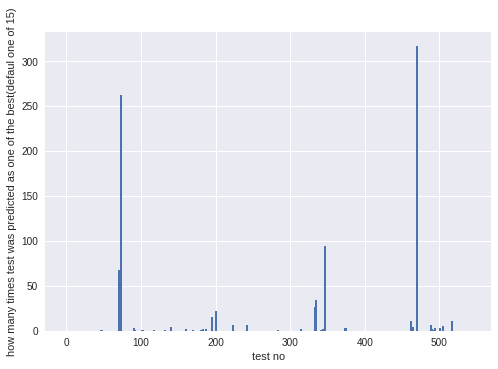

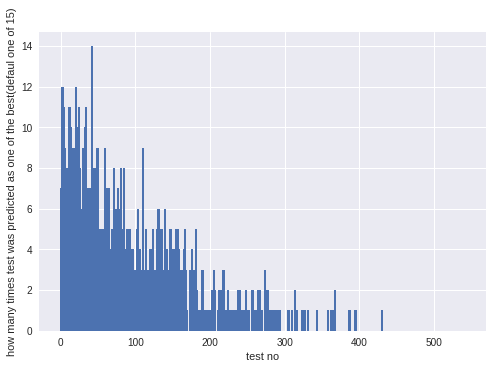

In [109]:
#Distributions of argmins through all the predictions
distribution_array = count_distribution(predictions)

# fake prediction
fake_distribution_array = count_distribution(fake_predictions_matrix)


In [0]:
create_plot(distribution_array)

# fake plot
create_plot(fake_distribution_array)

In [110]:


evaluation(predictions,15,yTest)

# evaluate random prediction
evaluation(fake_predictions_matrix, 15, yTest)

Percentage of fails predicted 48.924731182795696 %
Percentage of fails predicted 0.5376344086021506 %
